In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from cycler import cycler

In [2]:
df = pd.read_csv('cleanData.csv')

In [3]:
# Splitting Year and Month from the lastUpdated column
df['Year'] = pd.DatetimeIndex(df['lastUpdated']).year 
df['Month'] = pd.DatetimeIndex(df['lastUpdated']).month
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])
df['rating'].fillna(df['rating'].mean(), inplace = True)
df['rating'] = df['rating'].round(1)

In [4]:
# Converting number into months
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [5]:
# Split dataframe where rated is 'Everyone'
everyone_rated_df = df.copy()[df['rated']=='Everyone']
everyone_rated = df.copy()[df['rated']=='Everyone']
everyone_rated_df.set_index('Year', inplace = True)
everyone_rated_df.sort_index(inplace=True)
everyone_rated.sort_index(inplace=True)

In [6]:
# Applications(Everyone), whose price is more than
fig1_x = pd.DataFrame(everyone_rated_df[everyone_rated_df['price'] > 1])
fig1_x = fig1_x[['rating', 'category']]

# fig1 = fig1_x.plot(title='Applications(Everyone), whose price is more than 1', linestyle='-', markevery=100, marker='o', markerfacecolor='black')
# fig1.set_xlabel('Year (App got updated)')
# fig1.set_ylabel('Price in USD')
# fig1.set_ylim(2, None)

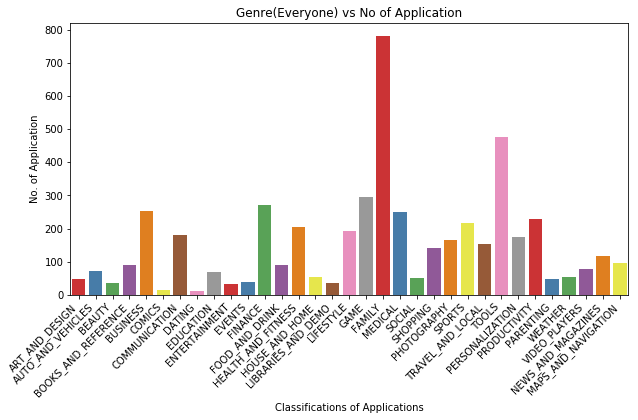

In [7]:
# Char # 1

plt.figure(figsize=(10,5))
chart1 = sns.countplot(
    data=everyone_rated[everyone_rated['Year'] == 2018],
    x='category',
    palette='Set1'
)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Classifications of Applications')
plt.ylabel('No. of Application')
plt.title("Genre(Everyone) vs No of Application")
fig_1 = chart1.get_figure()
fig_1.savefig("output_1.png", dpi=300, bbox_inches = "tight")
#plt.savefig("image.png",bbox_inches='tight',dpi=100)

<Figure size 1296x720 with 0 Axes>

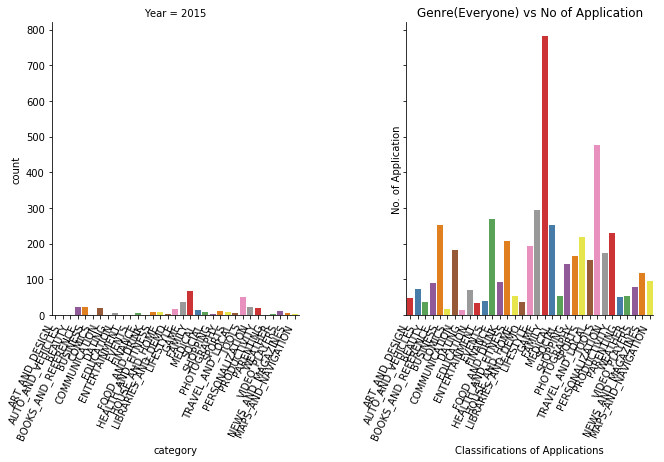

In [8]:
# Cat Plot
plt.figure(figsize=(18,10))
chart2 = sns.catplot(
    data=everyone_rated[everyone_rated['Year'].isin([2015, 2018])],
    x='category',
    kind = 'count',
    palette='Set1',
    col='Year',
    aspect=1,
)
chart2.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel('Classifications of Applications')
plt.ylabel('No. of Application')
plt.title("Genre(Everyone) vs No of Application")
chart2.savefig("output_2.png", dpi=300, bbox_inches = "tight")

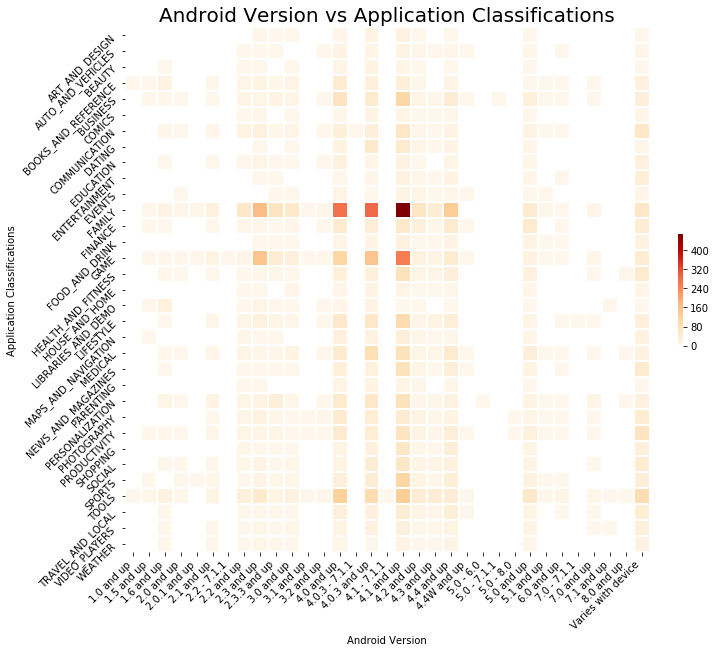

In [9]:
# Heatmap Os Version vs Category
# Application from Family category support highest number of the devices
by_category = (df
            .groupby('category')
            .filter(lambda x : len(x) > 0)
            .groupby(['category', 'osVer'])
            .size()
            .unstack()
           )
plt.figure(figsize=(10,10))
chart3 = sns.heatmap(
    by_category, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, horizontalalignment='right')
chart3.set_yticklabels(chart3.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Android Version')
plt.ylabel('Application Classifications')
plt.title('Android Version vs Application Classifications', fontsize = 20)
plt.subplots_adjust(top=0.9)
fig_3 = chart3.get_figure()
fig_3.savefig("output_3.png", dpi=300, bbox_inches = "tight")

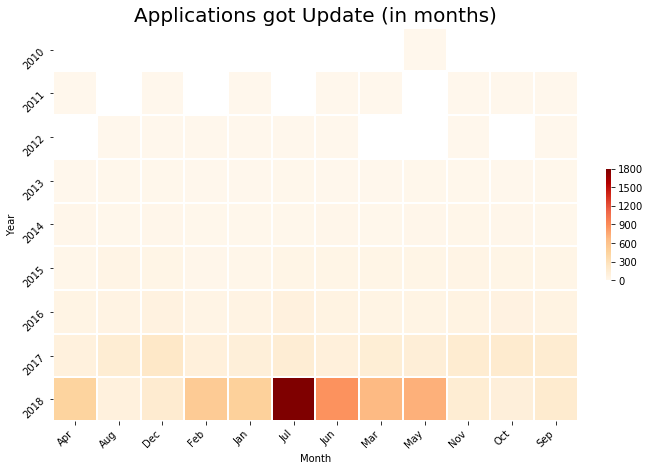

In [10]:
# Heatmap Applications got Update (in months)

by_category = (df
            .groupby('Year')
            .filter(lambda x : len(x) > 0)
            .groupby(['Year', 'Month'])
            .size()
            .unstack()
           )
plt.figure(figsize=(10,10))
chart4 = sns.heatmap(
    by_category, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45, horizontalalignment='right')
chart4.set_yticklabels(chart4.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Applications got Update (in months)', fontsize = 20)
plt.subplots_adjust(top=0.9)
fig_4 = chart4.get_figure()
fig_4.savefig("output_4.png", dpi=300, bbox_inches = "tight")

<Figure size 2520x1080 with 0 Axes>

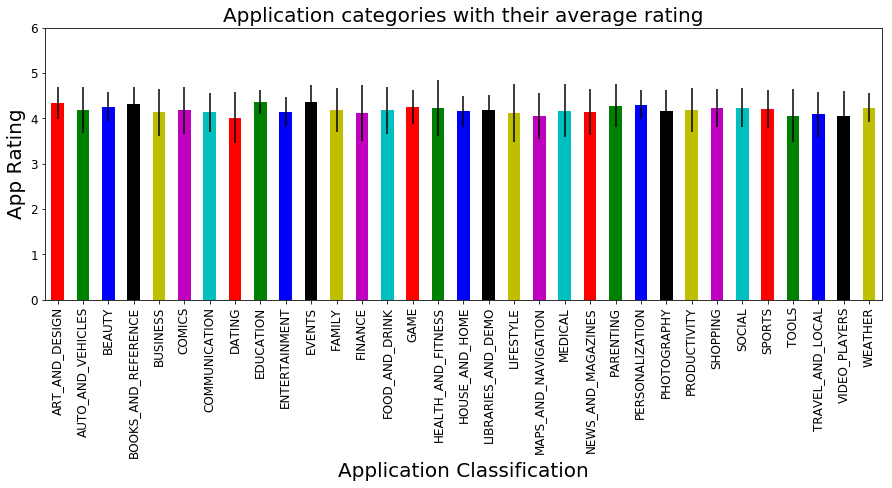

In [11]:
# Mean and standard deviation plot
byCategory = df.groupby('category')
plt.figure(figsize=(35,15))
std = byCategory.std()
std = pd.DataFrame(std[['rating']])
avg = byCategory.mean()
avg = pd.DataFrame(avg[['rating']])
my_colors = 'rgbkymc'
chart5 = avg.plot(figsize=(15,5),legend=False,kind="bar",rot=90,color=my_colors,fontsize=12,yerr=std)
chart5.set_title("Application categories with their average rating", fontsize=20)
chart5.set_xlabel("Application Classification", fontsize=20)
chart5.set_ylabel("App Rating", fontsize=20)
chart5.set_ylim(0,6)
fig_5 = chart5.get_figure()
fig_5.savefig("output.png", dpi=300, bbox_inches = "tight")

In [12]:
avg1 = pd.concat([avg, std], axis = 1, sort = True)
#avg.columns = ['average', 'Std. Deviation']

In [13]:
avg1.columns = ['average', 'std_deviation']

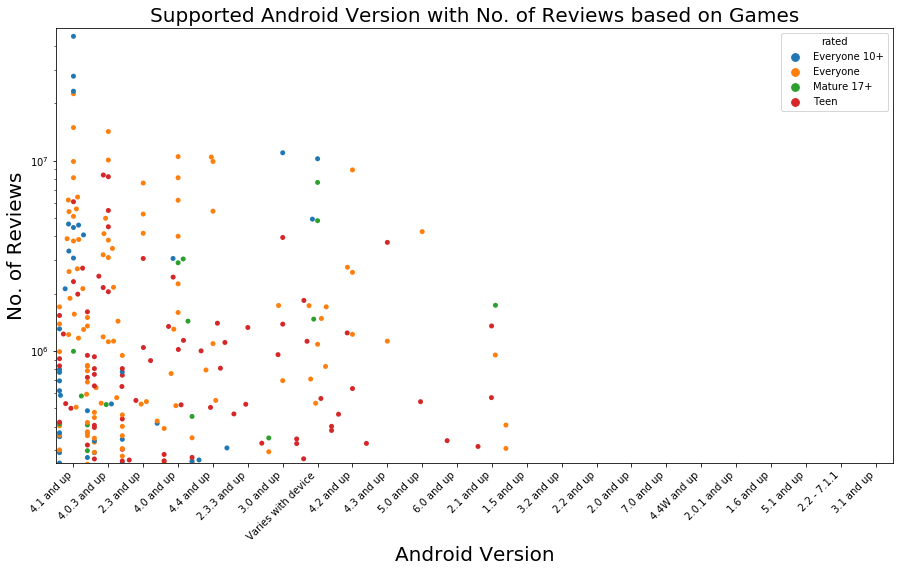

In [14]:
# 'Supported Android Version with No. of Reviews based on Games
game_data = byCategory.get_group('GAME')

plt.figure(figsize=(15,8))
chart6 = sns.swarmplot(data=game_data, x='osVer', y='reviews', hue='rated')
#chart6.legend_.remove()
plt.margins(0.02)
plt.title('Supported Android Version with No. of Reviews based on Games', fontsize = 20)
plt.xlabel('Android Version', fontsize = 20)
plt.ylabel('No. of Reviews', fontsize = 20)
# plt.ylim(0, None)
chart6.set_yscale('log')
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=45, horizontalalignment='right')
fig_6 = chart6.get_figure()
fig_6.savefig("output_6.png", dpi=300, bbox_inches = "tight")

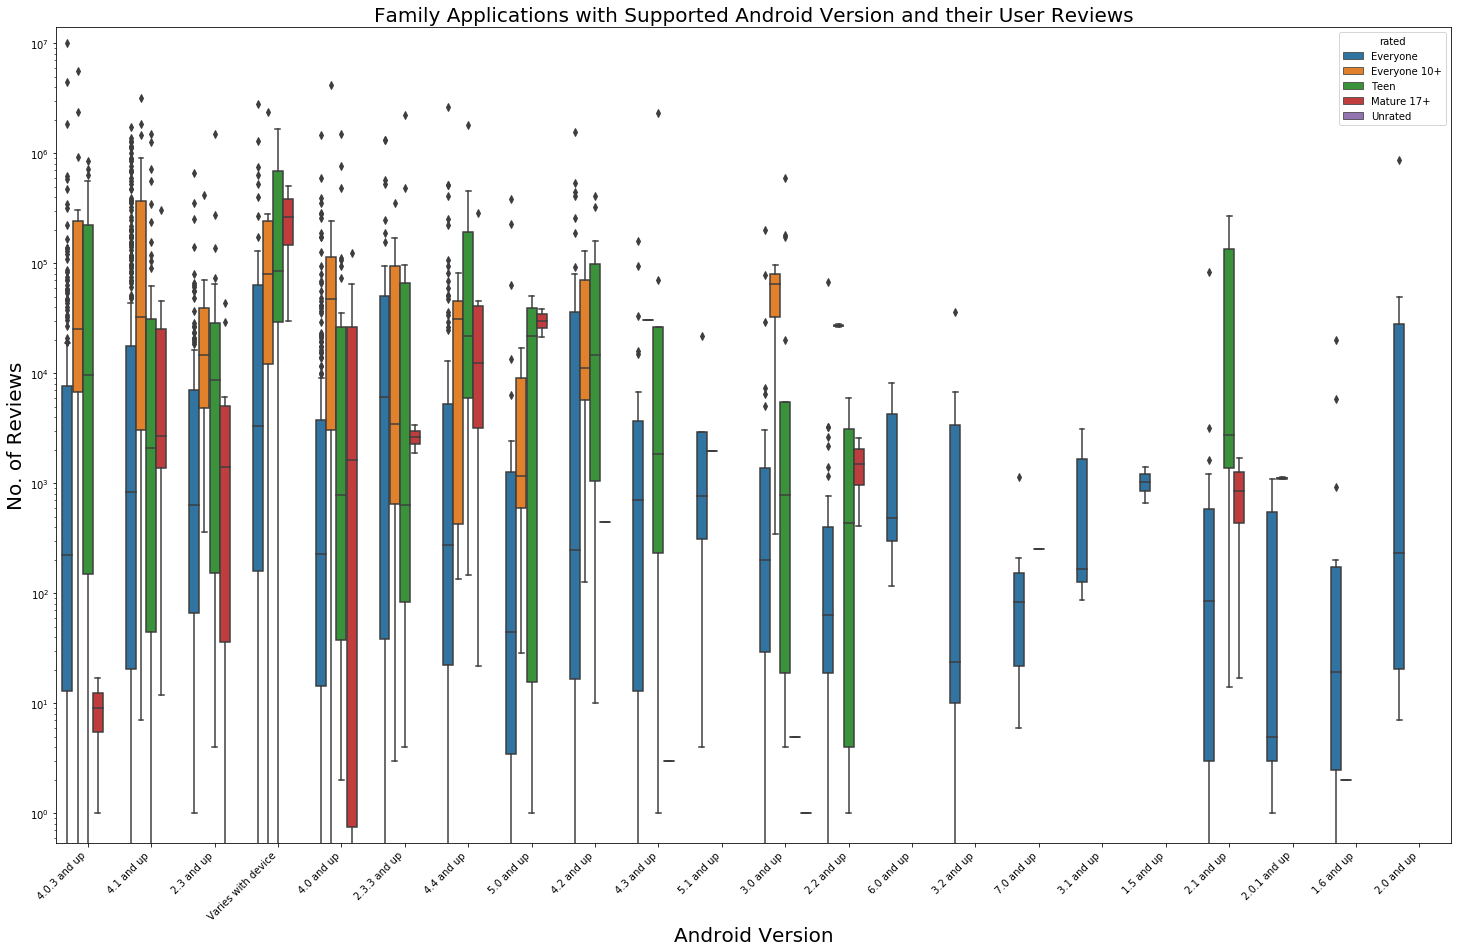

In [15]:
# Box Plot Family Applications with Supported Android Version and their User Reviews

family_data = byCategory.get_group('FAMILY')
plt.figure(figsize=(25,15))
chart7 = sns.boxplot(data=family_data, x='osVer', y='reviews', hue='rated')
plt.margins(0.02)
plt.title('Family Applications with Supported Android Version and their User Reviews', fontsize = 20)
plt.xlabel('Android Version', fontsize = 20)
plt.ylabel('No. of Reviews', fontsize = 20)
chart7.set_yscale('log')
chart7.set_xticklabels(chart7.get_xticklabels(), rotation=45, horizontalalignment='right')
fig_7 = chart7.get_figure()
fig_7.savefig("output_7.png", dpi=300, bbox_inches="tight")

In [16]:
# Pie Chart
from math import pi
import pandas as pd
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import operator

bycategory_count = byCategory.count()
bycategory_count_sr = bycategory_count.iloc[:,0]

categories={}
count=0

for index, row in bycategory_count_sr.items():
    categories[index] = row
    
       
categories = sorted(categories.items(), key=operator.itemgetter(1), reverse=True)

top_categories={}
for item, element in categories:
    if (count < 20):
        top_categories[item] = element
        count += 1
##################################################################

output_file("./pie.html")

x = top_categories

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=600, plot_width = 800, title="Top 20 Application Categories Based on Application Number", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None




In [17]:
#family_data['reviews'] = family_data['reviews'].div(1000)

In [18]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)